In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ========================
# 1. LOAD DATA
# ========================
df = pd.read_csv("insurance.csv")
print(f"📊 Dataset Shape: {df.shape}")
print(f"\n📋 First 5 rows:")
print(df.head())
print(f"\n📈 Dataset Info:")
print(df.info())
print(f"\n📊 Statistical Summary:")
print(df.describe())

📊 Dataset Shape: (1338, 7)

📋 First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

📊 Statistical Summary:
      

In [5]:
# ========================
# 2. DATA PREPROCESSING
# ========================
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Check for missing values
print(f"\n Missing Values (Before):")
print(df.isnull().sum())

# Introduce NaN values randomly
print(f"\n Introducing random NaN values...")
np.random.seed(42)
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    # Randomly select 5% of indices to set as NaN
    nan_indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
    df.loc[nan_indices, col] = np.nan
    print(f"   Added {len(nan_indices)} NaN values to '{col}'")

print(f"\n🔍 Missing Values (After Adding NaN):")
print(df.isnull().sum())

# Handle missing values with mean
print(f"\n🔧 Handling Missing Values with Mean...")
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"   ✅ Filled '{col}' NaN values with mean: {mean_value:.2f}")

print(f"\n✅ Missing Values (After Handling):")
print(df.isnull().sum())

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Encode categorical variables
print(f"\n🔄 Encoding categorical variables...")
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

X['sex'] = le_sex.fit_transform(X['sex'])
X['smoker'] = le_smoker.fit_transform(X['smoker'])
X['region'] = le_region.fit_transform(X['region'])

print("✅ Encoding complete!")
print(f"\nSex mapping: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"Smoker mapping: {dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_)))}")
print(f"Region mapping: {dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))}")



DATA PREPROCESSING

 Missing Values (Before):
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 Introducing random NaN values...
   Added 66 NaN values to 'age'
   Added 66 NaN values to 'bmi'
   Added 66 NaN values to 'children'
   Added 66 NaN values to 'charges'

🔍 Missing Values (After Adding NaN):
age         66
sex          0
bmi         66
children    66
smoker       0
region       0
charges     66
dtype: int64

🔧 Handling Missing Values with Mean...
   ✅ Filled 'age' NaN values with mean: 39.17
   ✅ Filled 'bmi' NaN values with mean: 30.61
   ✅ Filled 'children' NaN values with mean: 1.09
   ✅ Filled 'charges' NaN values with mean: 13265.17

✅ Missing Values (After Handling):
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🔄 Encoding categorical variables...
✅ Encoding complete!

Sex mapping: {'female': np.int64(0), 'male': np.int64(1)}
Smoker mapping:

C:\Users\ms318\AppData\Local\Temp\ipykernel_24932\3417065013.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [6]:
# ========================
# 3. TRAIN-TEST SPLIT
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\n Train set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")


 Train set: 1070 samples
 Test set: 268 samples


In [7]:
# ========================
# 4. FEATURE SCALING
# ========================
print(f"\n⚖️ Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Scaling complete!")


⚖️ Scaling features...
✅ Scaling complete!


In [8]:
# ========================
# 5. KNN MODEL TRAINING
# ========================
print("\n" + "="*70)
print("KNN MODEL TRAINING")
print("="*70)

# Train KNN with k=5
print(f"\n🚀 Training KNN with k=5...")
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print("✅ Training complete!")


KNN MODEL TRAINING

🚀 Training KNN with k=5...
✅ Training complete!


In [9]:
# ========================
# 6. PREDICTIONS
# ========================
print(f"\n🔮 Making predictions...")
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)
print("✅ Predictions complete!")


🔮 Making predictions...
✅ Predictions complete!


In [10]:
# ========================
# 7. MODEL EVALUATION
# ========================
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🟢 TRAIN SET METRICS:")
print(f"   MAE:  ${train_mae:,.2f}")
print(f"   RMSE: ${train_rmse:,.2f}")
print(f"   R²:   {train_r2:.4f}")

print(f"\n🔵 TEST SET METRICS:")
print(f"   MAE:  ${test_mae:,.2f}")
print(f"   RMSE: ${test_rmse:,.2f}")
print(f"   R²:   {test_r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\n📊 Cross-Validation R² Scores: {cv_scores}")
print(f"   Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


MODEL EVALUATION

🟢 TRAIN SET METRICS:
   MAE:  $3,010.06
   RMSE: $4,837.53
   R²:   0.8262

🔵 TEST SET METRICS:
   MAE:  $3,903.92
   RMSE: $5,769.80
   R²:   0.7799

📊 Cross-Validation R² Scores: [0.75748494 0.77022665 0.72336528 0.70036905 0.6814768 ]
   Mean CV R²: 0.7266 (+/- 0.0334)


In [11]:
# ========================
# 8. FIND OPTIMAL K
# ========================
print("\n" + "="*70)
print("FINDING OPTIMAL K")
print("="*70)

k_values = range(1, 31)
train_scores = []
test_scores = []

print(f"\n🔍 Testing k values from 1 to 30...")
for k in k_values:
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Find best k
best_k = k_values[np.argmax(test_scores)]
best_score = max(test_scores)
print(f"\n✅ Best k: {best_k} (Test R² = {best_score:.4f})")



FINDING OPTIMAL K

🔍 Testing k values from 1 to 30...

✅ Best k: 8 (Test R² = 0.7898)


In [12]:
# ========================
# 9. TRAIN FINAL MODEL WITH BEST K
# ========================
print(f"\n🚀 Training final model with k={best_k}...")
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_train_pred_best = knn_best.predict(X_train_scaled)
y_test_pred_best = knn_best.predict(X_test_scaled)

best_train_mae = mean_absolute_error(y_train, y_train_pred_best)
best_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
best_train_r2 = r2_score(y_train, y_train_pred_best)

best_test_mae = mean_absolute_error(y_test, y_test_pred_best)
best_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
best_test_r2 = r2_score(y_test, y_test_pred_best)

print(f"\n🏆 BEST MODEL (k={best_k}) METRICS:")
print(f"\n🟢 TRAIN:")
print(f"   MAE:  ${best_train_mae:,.2f}")
print(f"   RMSE: ${best_train_rmse:,.2f}")
print(f"   R²:   {best_train_r2:.4f}")

print(f"\n🔵 TEST:")
print(f"   MAE:  ${best_test_mae:,.2f}")
print(f"   RMSE: ${best_test_rmse:,.2f}")
print(f"   R²:   {best_test_r2:.4f}")


🚀 Training final model with k=8...

🏆 BEST MODEL (k=8) METRICS:

🟢 TRAIN:
   MAE:  $3,271.27
   RMSE: $5,127.19
   R²:   0.8047

🔵 TEST:
   MAE:  $3,888.39
   RMSE: $5,638.87
   R²:   0.7898



📊 Creating visualizations...


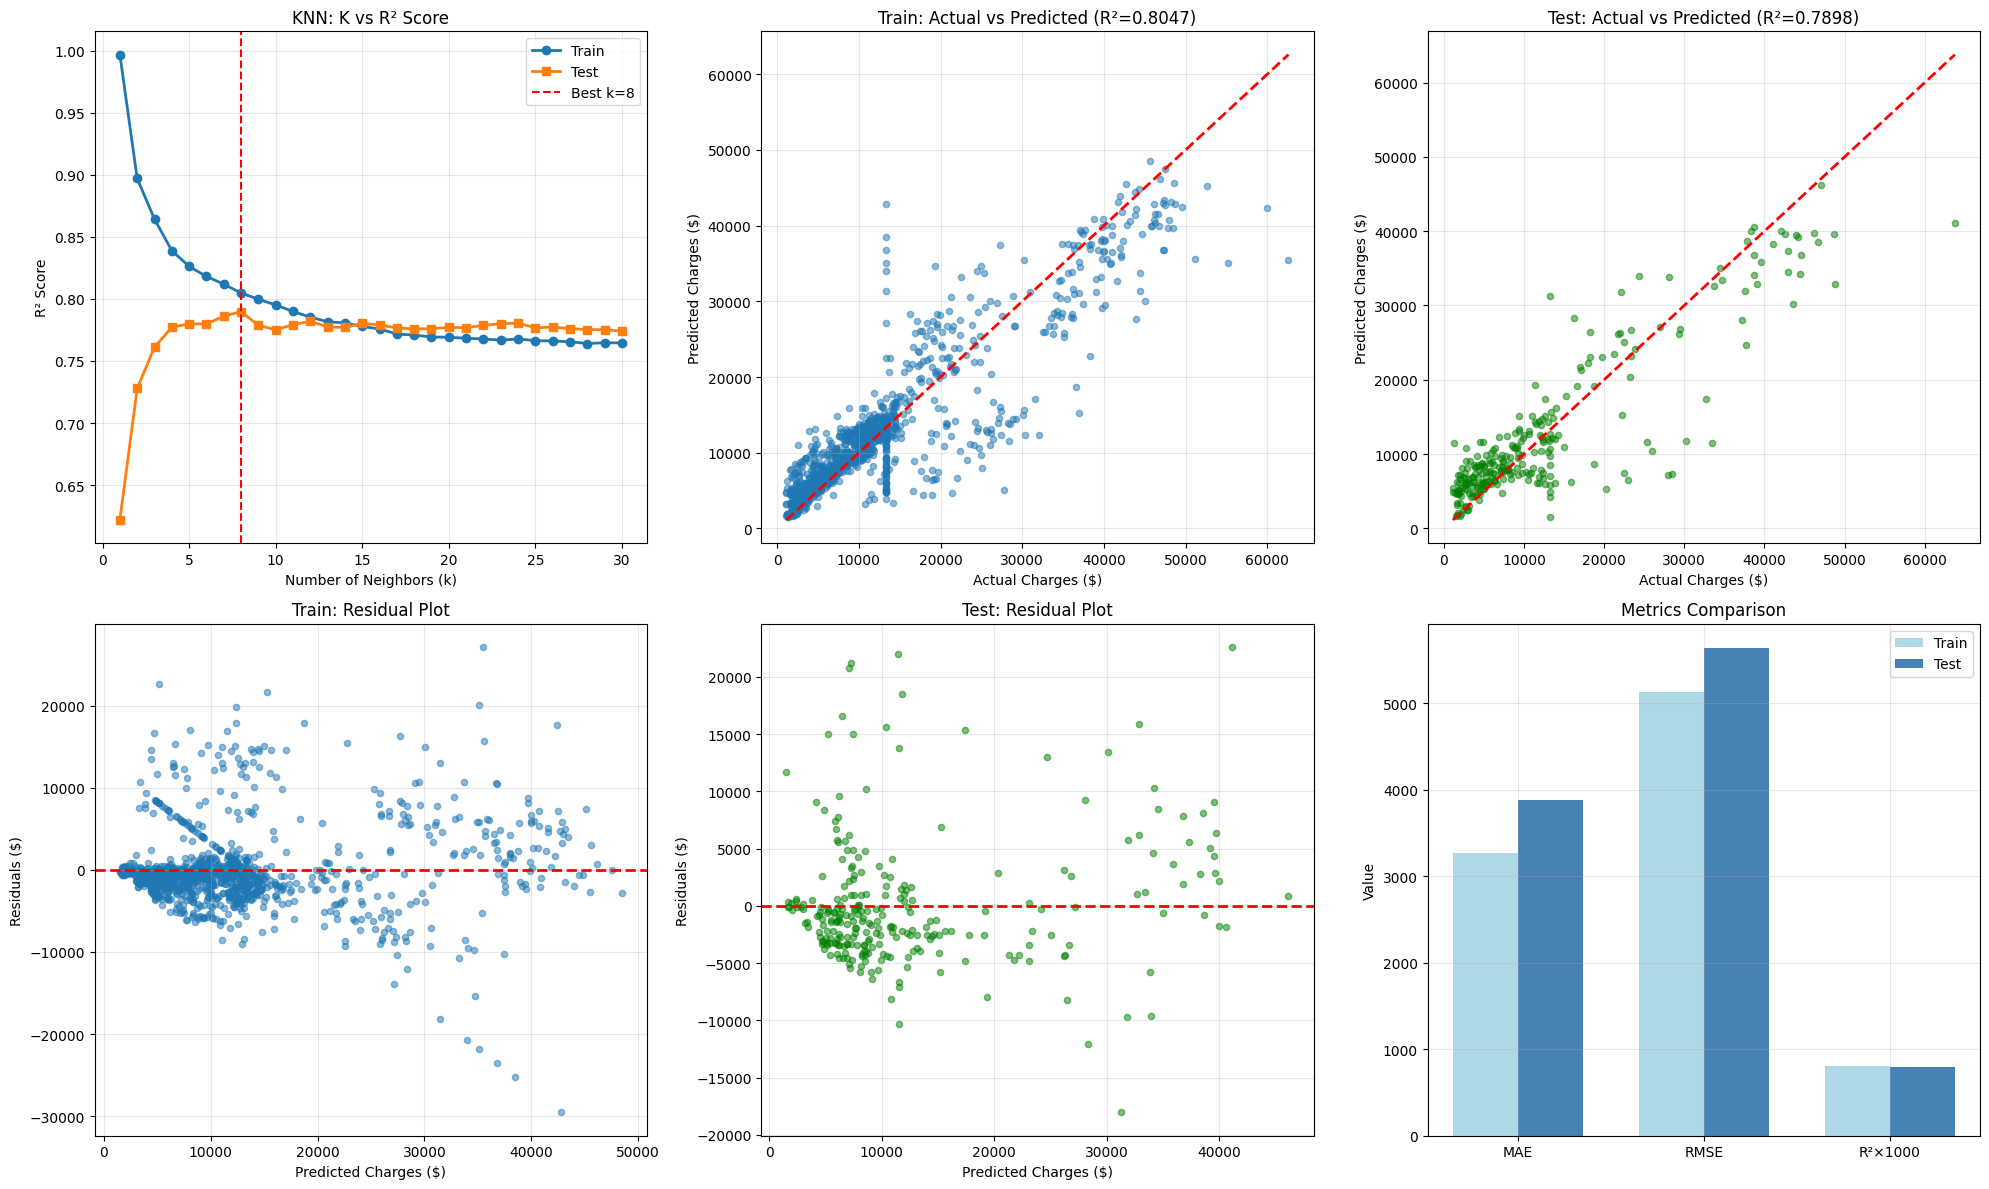

In [13]:
# ========================
# 10. VISUALIZATIONS
# ========================
print("\n📊 Creating visualizations...")

fig = plt.figure(figsize=(20, 12))

# 1. K vs R² Score
ax1 = plt.subplot(2, 3, 1)
ax1.plot(k_values, train_scores, 'o-', label='Train', linewidth=2)
ax1.plot(k_values, test_scores, 's-', label='Test', linewidth=2)
ax1.axvline(best_k, color='red', linestyle='--', label=f'Best k={best_k}')
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('R² Score')
ax1.set_title('KNN: K vs R² Score')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Actual vs Predicted (Train)
ax2 = plt.subplot(2, 3, 2)
ax2.scatter(y_train, y_train_pred_best, alpha=0.5, s=20)
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2)
ax2.set_xlabel('Actual Charges ($)')
ax2.set_ylabel('Predicted Charges ($)')
ax2.set_title(f'Train: Actual vs Predicted (R²={best_train_r2:.4f})')
ax2.grid(True, alpha=0.3)

# 3. Actual vs Predicted (Test)
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(y_test, y_test_pred_best, alpha=0.5, s=20, color='green')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2)
ax3.set_xlabel('Actual Charges ($)')
ax3.set_ylabel('Predicted Charges ($)')
ax3.set_title(f'Test: Actual vs Predicted (R²={best_test_r2:.4f})')
ax3.grid(True, alpha=0.3)

# 4. Residuals (Train)
ax4 = plt.subplot(2, 3, 4)
residuals_train = y_train - y_train_pred_best
ax4.scatter(y_train_pred_best, residuals_train, alpha=0.5, s=20)
ax4.axhline(0, color='red', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Charges ($)')
ax4.set_ylabel('Residuals ($)')
ax4.set_title('Train: Residual Plot')
ax4.grid(True, alpha=0.3)

# 5. Residuals (Test)
ax5 = plt.subplot(2, 3, 5)
residuals_test = y_test - y_test_pred_best
ax5.scatter(y_test_pred_best, residuals_test, alpha=0.5, s=20, color='green')
ax5.axhline(0, color='red', linestyle='--', lw=2)
ax5.set_xlabel('Predicted Charges ($)')
ax5.set_ylabel('Residuals ($)')
ax5.set_title('Test: Residual Plot')
ax5.grid(True, alpha=0.3)

# 6. Metrics Comparison
ax6 = plt.subplot(2, 3, 6)
metrics = ['MAE', 'RMSE', 'R²×1000']
train_vals = [best_train_mae, best_train_rmse, best_train_r2*1000]
test_vals = [best_test_mae, best_test_rmse, best_test_r2*1000]
x = np.arange(len(metrics))
width = 0.35
ax6.bar(x - width/2, train_vals, width, label='Train', color='lightblue')
ax6.bar(x + width/2, test_vals, width, label='Test', color='steelblue')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics)
ax6.set_ylabel('Value')
ax6.set_title('Metrics Comparison')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# ========================
# 11. PREDICTION EXAMPLES
# ========================
print("\n" + "="*70)
print("PREDICTION EXAMPLES")
print("="*70)

def predict_cost(age, sex, bmi, children, smoker, region):
    # Encode inputs
    sex_encoded = le_sex.transform([sex])[0]
    smoker_encoded = le_smoker.transform([smoker])[0]
    region_encoded = le_region.transform([region])[0]
    
    # Create input array
    input_data = np.array([[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]])
    
    # Scale
    input_scaled = scaler.transform(input_data)
    
    # Predict
    prediction = knn_best.predict(input_scaled)[0]
    
    return prediction

# Examples
examples = [
    (30, 'male', 25.0, 1, 'no', 'southwest'),
    (30, 'male', 25.0, 1, 'yes', 'southwest'),
    (45, 'female', 30.0, 2, 'no', 'northeast'),
    (50, 'male', 32.0, 3, 'yes', 'southeast'),
]

for age, sex, bmi, children, smoker, region in examples:
    cost = predict_cost(age, sex, bmi, children, smoker, region)
    print(f"\n👤 Person: {age}yr, {sex}, BMI {bmi}, {children} kids, {smoker}-smoker, {region}")
    print(f"   💰 Predicted Cost: ${cost:,.2f}")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)


PREDICTION EXAMPLES

👤 Person: 30yr, male, BMI 25.0, 1 kids, no-smoker, southwest
   💰 Predicted Cost: $5,026.63

👤 Person: 30yr, male, BMI 25.0, 1 kids, yes-smoker, southwest
   💰 Predicted Cost: $23,237.38

👤 Person: 45yr, female, BMI 30.0, 2 kids, no-smoker, northeast
   💰 Predicted Cost: $12,049.01

👤 Person: 50yr, male, BMI 32.0, 3 kids, yes-smoker, southeast
   💰 Predicted Cost: $39,744.91

✅ ANALYSIS COMPLETE!


c:\level3\level 3 sem 1\python\complete-pandas-tutorial\pandas_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\level3\level 3 sem 1\python\complete-pandas-tutorial\pandas_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\level3\level 3 sem 1\python\complete-pandas-tutorial\pandas_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\level3\level 3 sem 1\python\complete-pandas-tutorial\pandas_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
